<a href="https://colab.research.google.com/github/eaglehkim/python/blob/main/prac3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2022 - 1 - 11**

In [ ]:
# 지도 시각화 라이브러리
# 가볍다고 함
!pip install folium

In [ ]:
import folium as fo

daegu = fo.Map(location=[35.88,128.58],zoom_start=12)
daegu

In [ ]:
import pandas as pd

daegu_accident = pd.read_csv("/content/도로교통공단_대구광역시 북구 교통사고 다발지역 현황(무단횡단, 자전거)_20191231.CSV",encoding="cp949")

daegu_accident.head()

,대상사고,대상사고년도,시군구,다발지점명,중심점_경도,중심점_위도,사고건수,사망자수,부상자수
0,자전거,2017년,대구광역시 북구1,대구광역시 북구 노원동1가(원대오거리 부근),128.575868,35.887684,10,0,10
1,자전거,2017년,대구광역시 북구2,대구광역시 북구 침산동(성덕빌딩 부근),128.593499,35.887727,7,0,7
2,자전거,2017년,대구광역시 북구3,대구광역시 북구 노원동1가(오봉오거리 부근),128.582445,35.889756,6,2,4
3,자전거,2017년,대구광역시 북구4,대구광역시 북구 노원동3가(팔달교 부근),128.551322,35.894686,6,1,6
4,자전거,2017년,대구광역시 북구5,대구광역시 북구 고성동3가(대구광역시립북부도서관입구 부근),128.585730,35.884201,6,0,6


In [ ]:
for i in daegu_accident.index:  
  lat = daegu_accident["중심점_위도"] # lattitude = 위도 
  lat = lat[i]  
  lon = daegu_accident["중심점_경도"] # longitude = 경도 
  lon = lon[i]
  fo.Marker([lat,lon]).add_to(daegu)

daegu

In [ ]:
for i in daegu_accident.index:  
  lat = daegu_accident["중심점_위도"] # lattitude = 위도 
  lat = lat[i]  
  lon = daegu_accident["중심점_경도"] # longitude = 경도 
  lon = lon[i]

  tooltip = daegu_accident["대상사고"]  # 툴팁, 마커에 손올렸을 때 나오는 것
  tooltip = tooltip[i]

  # tooltip = daegu_accident["사고건수"]  ---> 대상사고가 아니라 사고건수가 표현된다
  # tooltip = tooltip[i]

  fo.Marker([lat,lon],tooltip=tooltip).add_to(daegu)

daegu

In [ ]:
daegu_CCTV = pd.read_csv("/content/대구광역시 달서구_CCTV 설치 위치_20210614.csv",encoding="cp949")

daegu_CCTV.head()

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치연도,관리기관전화번호,위도,경도,데이터기준일자
0,대구광역시 달서구청,두류남길 60(두류동),두류동 804-141,생활안전,1,200,회전,30,2015년,053-667-3900,35.857225,128.571289,2021-06-14
1,대구광역시 달서구청,본리서3길 5(본리동),본리동 1210-1,생활안전,1,200,회전,30,2015년,053-667-3900,35.839547,128.529792,2021-06-14
2,대구광역시 달서구청,호산동로36북길 60(호산동),호산동 357-41,생활안전,1,200,회전,30,2015년,053-667-3900,35.851494,128.488028,2021-06-14
3,대구광역시 달서구청,월배로68길 48(송현동),송현1동 798-321,생활안전,1,200,고정,30,2020년,053-667-3900,35.824289,128.549203,2021-06-14
4,대구광역시 달서구청,상화로15길 27(진천동),진천동 460,생활안전,1,200,회전,30,2015년,053-667-3900,35.809103,128.522292,2021-06-14


In [ ]:
for i in daegu_CCTV.index:  
  lat = daegu_CCTV["위도"] # lattitude = 위도 
  lat = lat[i]  
  lon = daegu_CCTV["경도"] # longitude = 경도 
  lon = lon[i]

  tooltip = daegu_CCTV["설치목적구분"]  # 툴팁, 마커에 손올렸을 때 나오는 것
  tooltip = tooltip[i]

  fo.Marker([lat,lon],tooltip=tooltip).add_to(daegu)

daegu

In [ ]:
# PCA - Principal component analysis (주성분 분석)
#        - the process of computing the principal components and using them to perform a change of basis on the data, 
#          sometimes using only the first few principal components and ignoring the rest.
#          (가장 본질적인 요소를 뽑아내는 것)

import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/work.csv")
df.head()

,app,per,fav
0,8,9,1
1,7,5,1
2,2,3,0
3,4,2,0
4,5,9,1


In [ ]:
app = df["app"]
per = df["per"]
fav = df["fav"]
mon = [5,4,6,7,3,6,5,7]

app = np.array(app)
per = np.array(per)
fav = np.array(fav)
mon = np.array(mon)

In [ ]:
cov = np.cov(app,per)
cov
# cov[0,0] app variance, cov[0,1] covariance, cov[1,0] covariance, cov[1,1] per variance

array([[5.14285714, 1.42857143],
       [1.42857143, 7.55357143]])

In [ ]:
# eigen value = λ
# eigen vector 1 - 좌우 뻗어 있는 방향(가장 많이 뻗어있다)
# eigen vector 2 - 1과 2는 서로 직각(가장 짧게 뻗어있다)
#                = 데이터가 어디로 뻗어 있다.

#    A      X     =    λ      X
# [a1 a2]  [x1]   =    λ     [x1] 
# [a3 a4]  [x2]               [x2]
# 데이터 고유벡터   스칼라   고유벡터

# eigen value에 데이터값을 다 벡터 내적한 값이 eigen vector 방정식

eigen_value, eigen_vector = np.linalg.eig(cov)
eigen_value
# 긴 것은 4.48, 짧은 것 8.22

array([4.47906952, 8.21735905])

In [ ]:
A = np.array([3,1])
B = np.array([1,3])
A + B 

array([4, 4])

In [ ]:
# 벡터의 내적
C = np.dot(A,B)
C
# vector A에 대해서 vector B가 6만큼 영향을 미친다~

6

In [ ]:
# eigen_vector[0,0], eigen_vector[0,1] - 가장 길게 뻗어있는
# eigen_vector[1,0], eigen_vector[1,1] - 가장 짧게 뻗어있는

eigen_vector

array([[-0.90688228, -0.42138407],
       [ 0.42138407, -0.90688228]])

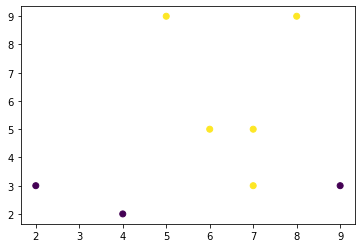

In [ ]:
plt.scatter(app,per,c=fav)

In [ ]:
projected_x = []
for i in np.arange(8):
  projected_x.append(app[i]*eigen_vector[0,0]+per[i]*eigen_vector[0,1])
projected_x
np.array(projected_x)

array([-11.04751483,  -8.45509629,  -3.07791676,  -4.47029725,
        -8.32686799,  -9.42609271,  -7.61232815,  -7.54821401])

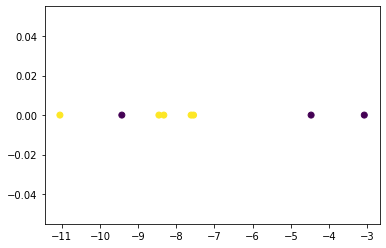

In [ ]:
plt.scatter(projected_x, np.zeros(8),c=fav)

In [ ]:
######################## 정보 보존률 ---- PCA를 쓸 때 반드시 기재해주어야 하는 값 ########################
cons = eigen_value[0] / (eigen_value[0] + eigen_value[1]) * 100
cons
# 호감도라는 새로운 방정식을 만들었을 때 56퍼센트가 (방정식을 만들기 위한) 의미있는 정보
#                                        44퍼센트는 가비지 벨류
# 보통 보존률이 60~70퍼정도

35.27818465860877

In [ ]:
# 3차원 - mon 추가 (mon -> money)
data = np.array([app,per,mon])
data

array([[8, 7, 2, 4, 5, 9, 7, 6],
       [9, 5, 3, 2, 9, 3, 3, 5],
       [5, 4, 6, 7, 3, 6, 5, 7]])

In [ ]:
data.T # 데이터를 [외모,성격,호감도] 로 묶어준다

array([[8, 9, 5],
       [7, 5, 4],
       [2, 3, 6],
       [4, 2, 7],
       [5, 9, 3],
       [9, 3, 6],
       [7, 3, 5],
       [6, 5, 7]])

In [ ]:
np.cov(data) # 각 자료들 사이의 공분산

array([[ 5.14285714,  1.42857143, -0.57142857],
       [ 1.42857143,  7.55357143, -2.51785714],
       [-0.57142857, -2.51785714,  1.98214286]])

In [ ]:
cov = np.cov(data)
eigen_value, eigen_vector = np.linalg.eig(cov)
eigen_vector 
# 0.36 * 외모 + 0.93 * 성격 + 0.01 * 돈 = 호감도

array([[ 0.36092262,  0.93258094,  0.00525838],
       [ 0.87001433, -0.33872838,  0.35824314],
       [-0.33587189,  0.12472319,  0.93361352]])

In [ ]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 1) # 1차원 - 1, 2차원 - 2 ....
pca_value = pca.fit_transform(data.T)
pca_value

array([[ 4.43660632],
       [ 0.93149826],
       [-3.28488729],
       [-3.76892826],
       [ 4.02558222],
       [-0.75842893],
       [-1.14440229],
       [-0.43704003]])

**2022 - 1 - 13**

In [ ]:
# Artificial  Intelligence    != 지식
#    인공        지능         -> 직관력(intuition) -> 사물 분별 능력

# 인공지능 - 강 인공지능 : 존재x
#          - 약 인공지능 : 인간 보조 (= 머신러닝)

# 머신러닝 -   지도 학습 (supervised)   -> (인간이) 분류해준 것을 학습       - 아는 것을 분류할 때 target 환자 vs 건강
#          - 비지도 학습 (unsupervised) -> 데이터만 주면 알아서 분류 후 학습 - 모르는 것을 개척할 때 ex) PCA target = clustering 환자
# 지도 학습: 분류,회귀이지만 거의 같음

# 인공지능에서 '분류'와 '예측'은 같은 말이다. 
#             - 분류를 통해 만들어진 모델을 통해 예측을 한다

# 인공지능 - 분류 : 1 or 0
#          - 회귀 : y = ax + b

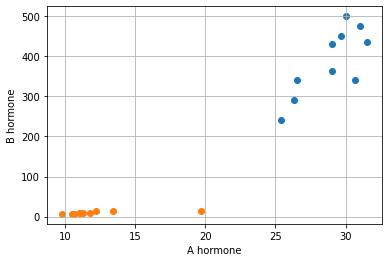

In [ ]:
####################### KNN 기법 ##############################
# KNN 은 분류와 회귀가 같이 있다 하지만 분류를 압도적으로 많이 쓴다
# 민주적인 방식이며
# 수학적 고찰이 크게 없을 떄 강하다

# 과대적합 overfitting - 꼰대, '나만 옳아', 니들이 잘못
# 과소적합 underfitting - 멍청이, '나는 바보'

#          - 수식이 없다고 한다, 3차원 형태에서의 그 구역의 평균을 구해볼 수 있다
# 약점 - 이상하게 튀는 애들한테 취약하다.

A_heat = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 30.0, 30.7, 31.0, 31.5] # 발정기가 온 A_Hormone
B_heat = [242, 290, 340, 363, 430, 450, 500, 340, 475, 435]        #             B_Hormone

A_norm = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 12.2, 13.4, 19.7]
B_norm = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 13.0, 14.3, 15.0]

import numpy as np 
import matplotlib.pyplot as plt 

plt.scatter(A_heat, B_heat)
plt.scatter(A_norm, B_norm)

plt.xlabel("A hormone")
plt.ylabel("B hormone")

plt.grid()
plt.show()

In [ ]:
A = A_heat + A_norm
B = B_heat + B_norm 
A,B

([25.4,
  26.3,
  26.5,
  29.0,
  29.0,
  29.7,
  30.0,
  30.7,
  31.0,
  31.5,
  9.8,
  10.5,
  10.6,
  11.0,
  11.2,
  11.3,
  11.8,
  12.2,
  13.4,
  19.7],
 [242,
  290,
  340,
  363,
  430,
  450,
  500,
  340,
  475,
  435,
  6.7,
  7.5,
  7.0,
  9.7,
  9.8,
  8.7,
  10.0,
  13.0,
  14.3,
  15.0])

In [ ]:
heat_data = [[a, b] for a, b in zip(A,B)]
heat_data

[[25.4, 242],
 [26.3, 290],
 [26.5, 340],
 [29.0, 363],
 [29.0, 430],
 [29.7, 450],
 [30.0, 500],
 [30.7, 340],
 [31.0, 475],
 [31.5, 435],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [12.2, 13.0],
 [13.4, 14.3],
 [19.7, 15.0]]

In [ ]:
heat_target = [1] * 10 + [0] * 10
heat_target

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(heat_data, heat_target)

KNeighborsClassifier()

In [ ]:
kn.predict([[10,200]]) # answer -> 1 -> 임신 가능

array([1])

In [ ]:
kn.predict([[10,50]]) # answer -> 0 -> 임신 불가능

array([0])

In [ ]:
# 평가               1-100점, 0-0점
kn.score(heat_data, heat_target)

1.0

In [ ]:
kn.predict([[30,600]]) # 는 임신이 불가능한 소인데 결과는 1이 나온다.

# 내부에서 교육시킨 데이터로는 거의 100퍼센트가 나오기 때문에
# 외부에 적용시키면 안맞는 경우가 많을 수 있다.

################## 학습 이후의 정확도는 의미가 없다 #################

array([1])

In [ ]:
############################### 정확도 이슈 해결법 ###################################

# 데이터를 나눈다 - 훈련용   (7) or (8)   -> 훈련(fit)은 훈련용 데이터로
#                 - 테스트용 (3)    (3)                                 -> fit 후 테스트는 테스트용 데이터로

heat_data[4]

[29.0, 430]

In [ ]:
heat_data[0:3]

[[25.4, 242], [26.3, 290], [26.5, 340]]

In [ ]:
# 테스트용과 훈련용으로 분류
train_input = heat_data[:15]
train_output = heat_target[:15]
test_input = heat_data[15:20]
test_output = heat_target[15:20]

In [ ]:
kn = kn.fit(train_input,train_output) # learning

In [ ]:
kn.score(test_input, test_output)

1.0

In [ ]:
heat_data = np.array(heat_data)
heat_target = np.array(heat_target)

In [ ]:
heat_data.shape

(20, 2)

In [ ]:
# 랜덤화 
np.random.seed(3)
index = np.arange(20)
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [ ]:
np.random.shuffle(index)
index

array([14,  2,  1, 17,  4, 16,  6,  7, 15, 12,  9, 11, 19, 18, 13,  5,  0,
        8,  3, 10])

In [ ]:
train_input = heat_data[index[:15]]
train_output = heat_target[index[:15]]
test_input = heat_data[index[15:20]]
test_output = heat_target[index[15:20]]

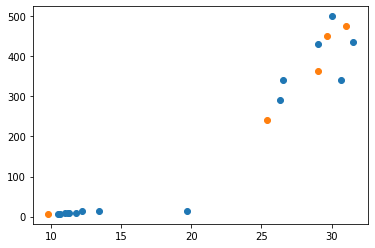

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.show()

In [ ]:
kn = kn.fit(train_input,train_output) # learning

In [ ]:
kn.score(test_input,test_output)
# 0.85 ~ 0.95 면 성능이 대체로 가장 뛰어남

1.0

In [ ]:
kn.predict([[30,50]])

array([0])

**2022 - 1 - 18**

In [ ]:
# 일반적으로는 score를 통해서 맞고 틀리고를 결정하지만
# 몇몇 분야에서는 케이스마다 경중의 차이가 있기때문에 (예로 범죄나 의학) 1종 오류, 2종 오류 참고
### 인공지능에서는 얼마나 정확하냐 + 얼마나 실수를 안하느냐를 써주는 것이 관건 ###

In [ ]:
A_heat = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 30.0, 30.7, 31.0, 31.5]
B_heat = [242, 290, 340, 363, 430, 450, 500, 340, 475, 435]

A_norm = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 12.2, 13.4, 19.7]
B_norm = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 13.0, 14.3, 15.0]

######################## SCALING 문제 ###########################
# 철저히 B 호르몬에 의해서 학습된다 -------- ####### 굉장히 기분 나쁜 데이터들!? ######
# 호르몬은 극소량만 바뀌어도 영향이 크기때문에 A,B 호르몬 모두 필요

# 데이터들을 [전처리]정규화(normalization)해주어야 한다!

################################# target을 0 과 1이 아닌 0,1,2,3, ... 이런식으로 나누기 #####

heat_target = [2] * 5 + [1] * 5 + [0] * 10 # <----- 이런식으로
heat_target 

####################################################################################

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [ ]:
A = A_heat + A_norm    # 보통 분석은 여기서 시작 A,B,Target
B = B_heat + B_norm
A,B

([25.4,
  26.3,
  26.5,
  29.0,
  29.0,
  29.7,
  30.0,
  30.7,
  31.0,
  31.5,
  9.8,
  10.5,
  10.6,
  11.0,
  11.2,
  11.3,
  11.8,
  12.2,
  13.4,
  19.7],
 [242,
  290,
  340,
  363,
  430,
  450,
  500,
  340,
  475,
  435,
  6.7,
  7.5,
  7.0,
  9.7,
  9.8,
  8.7,
  10.0,
  13.0,
  14.3,
  15.0])

In [ ]:
heat_target = [1] * 10 + [0] * 10
heat_target 

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
##### 반드시 칼럼 스택으로 바꾸어주어야 한다. #####

hormon_data = np.column_stack((A,B))
hormon_data

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ],
       [ 29.7, 450. ],
       [ 30. , 500. ],
       [ 30.7, 340. ],
       [ 31. , 475. ],
       [ 31.5, 435. ],
       [  9.8,   6.7],
       [ 10.5,   7.5],
       [ 10.6,   7. ],
       [ 11. ,   9.7],
       [ 11.2,   9.8],
       [ 11.3,   8.7],
       [ 11.8,  10. ],
       [ 12.2,  13. ],
       [ 13.4,  14.3],
       [ 19.7,  15. ]])

In [ ]:
# shuffle
from sklearn.model_selection import train_test_split # 알아서 랜덤하게 섞어줌

train_input, test_input, train_target, test_target = train_test_split(hormon_data, heat_target, random_state = 9)

In [ ]:
train_input

array([[ 11.3,   8.7],
       [ 26.5, 340. ],
       [ 29. , 430. ],
       [ 31.5, 435. ],
       [  9.8,   6.7],
       [ 13.4,  14.3],
       [ 10.5,   7.5],
       [ 11.2,   9.8],
       [ 25.4, 242. ],
       [ 10.6,   7. ],
       [ 11. ,   9.7],
       [ 19.7,  15. ],
       [ 12.2,  13. ],
       [ 31. , 475. ],
       [ 26.3, 290. ]])

In [ ]:
test_input

array([[ 29. , 363. ],
       [ 30. , 500. ],
       [ 30.7, 340. ],
       [ 29.7, 450. ],
       [ 11.8,  10. ]])

In [ ]:
train_target

[0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]

In [ ]:
test_target

[1, 1, 1, 1, 0]

In [ ]:
############################# 전처리 #####################################
# 이미 유의미한 데이터들이라면 전처리를 하면 안된다
# 전처리 = 정규화

np.mean(A), np.std(A), np.mean(B), np.std(B)

(20.529999999999998, 8.71154980471328, 198.33499999999998, 196.50216353770764)

In [ ]:
mean = np.mean(train_input, axis = 0)
mean

array([ 18.62666667, 153.58      ])

In [ ]:
std = np.std(train_input, axis = 0)
std

array([  8.31997329, 183.52587538])

In [ ]:
train_input_scaled = (train_input - mean) / std # 표준화
train_input_scaled

array([[-0.8806118 , -0.78942547],
       [ 0.94631714,  1.01576957],
       [ 1.24679887,  1.50616364],
       [ 1.54728061,  1.53340775],
       [-1.06090084, -0.80032311],
       [-0.62820714, -0.75891206],
       [-0.97676596, -0.79596406],
       [-0.89263107, -0.78343176],
       [ 0.81410518,  0.48178492],
       [-0.96474669, -0.79868847],
       [-0.91666961, -0.78397664],
       [ 0.12900682, -0.75509788],
       [-0.77243838, -0.76599553],
       [ 1.48718426,  1.75136067],
       [ 0.9222786 ,  0.74332843]])

In [ ]:
mean2 = np.mean(test_input, axis = 0)
std2 = np.std(test_input, axis = 0)
test_input_scaled = (test_input-mean2)/std2 # 표준화
test_input_scaled

array([[ 0.38118347,  0.17738379],
       [ 0.51929343,  0.97677782],
       [ 0.6159704 ,  0.04317895],
       [ 0.47786044,  0.68502818],
       [-1.99430774, -1.88236873]])

In [ ]:
kn = kn.fit(train_input_scaled, train_target) # 학습은 트레이닝 이미지로

In [ ]:
kn.score(test_input_scaled, test_target) # 테스트는 테스트용 이미지로

1.0

In [ ]:
# 정규화 후 예상할 때 (kn.predict) 정규화를 거친 데이터를 넣어주어야 한다
a = (30-mean)/std                         # 데이터 수가 많아지면 mean, mean2 같이 써도 된다고 함
kn.predict([a]),a,mean

(array([1]),
 array([ 1.36699157, -0.67336554]),
 array([ 18.62666667, 153.58      ]))

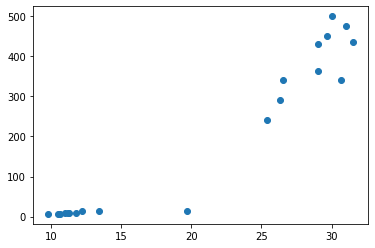

In [ ]:
# KNN (K - Nearest Neighbor)
# 개수가 적으면 - 너무 대충
# 개수가 많으면 - 너무 쪼잔         , 즉 최적의 숫자를 찾는게 중요(인간이 선택하는 hyper-parameter)[대체로 경험에 의존]

plt.scatter(A,B)
plt.show()

In [ ]:
# KNN 회귀 - 상관계수 - 상관계수의 경우 y=ax+b경우 정확도를 언급해야

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

In [ ]:
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [ ]:
knr.score(test_input,test_target) # knr.score 는 상관계수와 같은 말이다
# knr은 동작, 모양, 아름다움을 구분할 때 쓰기 좋다 (수학적으로 설명하기 힘든 것)
# knn은 돌발변수에 약하다, A나 B중에 한개에 가중치가 너무 클때 쓰기 힘들다
# 상관계수의 경우 y=ax+b경우 정확도를 언급해주어야한다.

# 회귀할 때는 스케일링을 할 필요가 없다.

1.0

In [ ]:
#### A호르몬으로 B호르몬을 예측 (regressor) ####
train_input, test_input, train_target, test_target = train_test_split(A,B)

In [ ]:
train_input = np.array(train_input) # array 형식으로 만들고
train_input.shape # 두번째칸이 비어있다.

(15,)

In [ ]:
# 그래서 reshape(-1,1)을 해야한다
train_input = train_input.reshape(-1,1)
train_input.shape

(15, 1)

In [ ]:
test_input = np.array(test_input)
test_input = test_input.reshape(-1,1)
test_input.shape

(5, 1)

In [ ]:
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [ ]:
knr.predict([[130]])
# a = np.array([130])
# knr.predict(a.reshape(-1,1))

array([402.])

In [ ]:
a = np.array([10])
knr.predict(a.reshape(-1,1))

array([8.14])

In [ ]:
#################### MAE 기법 (Mean Absolute Error) ####################
# 상관계수의 성능 평가(회귀의 성능평가) 80%는 이 방식으로 이루어진다.
# 회귀선에서 차이나는 error들을 다 절대값을 구해서 더한다. (error을 다 더하면 0, 아니면 뭔가 있다)

from sklearn.metrics import mean_absolute_error
test_prediction = knr.predict(test_input)
test_prediction

array([402. , 402. , 402. , 402. ,   8.8])

In [ ]:
mae = mean_absolute_error(test_target, test_prediction) # 작으면 좋고 크면 안좋고
mae # mae = 41.42

41.42

In [ ]:
# 최적의 이웃의 개수 구하기
knr.n_neighbors = 4   # k를 늘리면 과대적합 해소, k를 줄이면 과소적합
                      # 과대적합일 때는 k를 늘리고, 과소적합일 때는 k를 줄여야 한다.
knr.fit(train_input,train_target)
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
mae

41.485

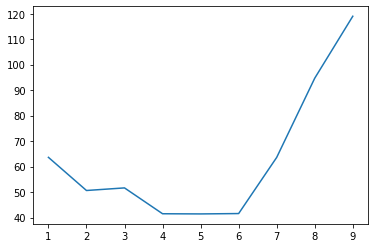

In [ ]:
# 최적의 이웃의 개수 구하기
neighbor = []
for i in range(1,10):
  knr.n_neighbors = i
  knr.fit(train_input,train_target)
  test_prediction = knr.predict(test_input)
  mae = mean_absolute_error(test_target, test_prediction)
  neighbor.append(mae)
plt.plot(np.arange(1,10),neighbor)

**2022 - 1 - 20**

In [14]:
# 호감도 KNN으로 돌려보기 EX

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [7]:
data_frame = pd.read_csv("/content/work.csv",encoding="cp949")

data_frame.head()

,app,per,fav
0,8,9,1
1,7,5,1
2,2,3,0
3,4,2,0
4,5,9,1


In [13]:
ap = np.array(data_frame["app"])
pe = np.array(data_frame["per"])
fa = np.array(data_frame["fav"])

app_per_data = np.column_stack((ap,pe))
app_per_data

array([[8, 9],
       [7, 5],
       [2, 3],
       [4, 2],
       [5, 9],
       [9, 3],
       [7, 3],
       [6, 5],
       [7, 2],
       [5, 6],
       [4, 9],
       [9, 5],
       [5, 3],
       [2, 3],
       [7, 3],
       [8, 2],
       [2, 8],
       [3, 7],
       [2, 5],
       [7, 7],
       [6, 9],
       [9, 4],
       [8, 2],
       [6, 5],
       [8, 8],
       [2, 4],
       [8, 4],
       [6, 2],
       [4, 9]])

In [17]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(app_per_data, fa, random_state = 9)

In [18]:
kn = kn.fit(train_input, train_target)

In [19]:
kn.score(test_input, test_target)

0.875

In [24]:
kn.predict([[7,2]])

array([0])

In [ ]:
# 결정트리 (Decision Tree) -> (나무를 반복하면 숲) -> Random Forest 기법
# - 가장 컴퓨터스럽다 - 왜 그렇게 분류를 했는지에 대한 '근거'를 알 수 있다
# - 스무고개와 같다
# - 절반을 날릴 수 있는 질문이 좋은듯

# 지니 불순도 (Gini Impurity) 1 - 긍정비율^2 - 부정비율^2 = J
# - 데이터 분석에서 흔히 결정트리에서 사용되는 클래스개수에 따른 케이스들의 불순한 정도를 나타내는 척도
# ex) 남자,여자 1 - 0.5^2 - 0.5^2 = 0.5
# - 한쪽으로 치우쳐졌으면 J = 1 - 0^2 - 1^2 = 0 : 불순하지 않다. 순수하다

# [information gain](부모 J - 자식 J) 간에 차이가 가장 큰 방향으로 이동한다
# - 즉 A.남자인지 물어볼때 지니계수는 0.5이고 B.아시아인인지 물어볼때 0.48이고 C.사람인지 물어볼 때 0이면
# - A를 부모노드이고 B와 C가 자식노드일 때 정보차이 즉 인포메이션 게인간의 차이가 큰 C방향으로 이동하는게 맞다.

# 이상한게 들어가 있을 때 Random Forest를 돌린다?
# PCA 후에 결정트리를 돌려도 된다
# 웬만한 상황에선 결정트리를 쓴다고 한다

# 결정트리는 데이터가 적으면 궁색한 답이 나온다.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [32]:
A_heat = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 30.0, 30.7, 31.0, 31.5]
B_heat = [242, 290, 340, 363, 430, 450, 500, 340, 475, 435]

A_norm = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 12.2, 13.4, 19.7]
B_norm = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 13.0, 14.3, 15.0]

A = np.array(A_heat + A_norm)
B = np.array(B_heat + B_norm)
C = np.array([1]*10 + [0]*10)

In [31]:
data = np.column_stack((A,B))
data

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ],
       [ 29.7, 450. ],
       [ 30. , 500. ],
       [ 30.7, 340. ],
       [ 31. , 475. ],
       [ 31.5, 435. ],
       [  9.8,   6.7],
       [ 10.5,   7.5],
       [ 10.6,   7. ],
       [ 11. ,   9.7],
       [ 11.2,   9.8],
       [ 11.3,   8.7],
       [ 11.8,  10. ],
       [ 12.2,  13. ],
       [ 13.4,  14.3],
       [ 19.7,  15. ]])

In [34]:
train_input, test_input, train_target, test_target = train_test_split(data, C)

In [35]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [36]:
DT.fit(train_input,train_target)

DecisionTreeClassifier()

In [40]:
DT.score(test_input, test_target)

1.0

In [41]:
DT.predict(test_input),test_target

(array([0, 0, 0, 1, 0]), array([0, 0, 0, 1, 0]))

In [42]:
from sklearn.tree import plot_tree # 그림

[Text(0.5, 0.75, 'X[1] <= 128.5\ngini = 0.48\nsamples = 15\nvalue = [6, 9]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]')]

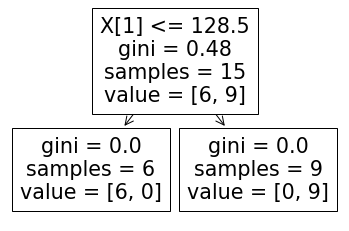

In [43]:
plot_tree(DT)
# X[1] <= 128.5  <-(이게 가장 좋은 질문 이라고 DT에서 결정을 했음)

In [44]:
DT.feature_importances_
# 중요도가 A,B 호르몬에서
#            B호르몬이 중요하다고 판단했다.

array([0., 1.])

In [51]:
from sklearn.datasets import load_wine

wine = load_wine()

df = pd.DataFrame(data = wine.data, columns = wine.feature_names)

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [78]:
Alcohol = np.array(df["alcohol"])
Magnesium = np.array(df["magnesium"])
Color = np.array(df["color_intensity"])
Hue = np.array(df["hue"])
Malic_acid = np.array(df["malic_acid"])

Proline = np.array(df["proline"]) # target

# 표준화가 진행되어야 한다. (하지만 시간관계상 여기서는 생략)

In [79]:
data = np.column_stack((Alcohol,Magnesium,Color,Hue,Malic_acid))

In [80]:
train_input, test_input, train_target, test_target = train_test_split(data, Proline)

In [81]:
DT = DecisionTreeClassifier()

In [82]:
DT.fit(train_input,train_target)

DecisionTreeClassifier()

In [83]:
DT.score(test_input, test_target)

0.0

In [84]:
DT.predict(test_input)

array([1270.,  520.,  937.,  392.,  720.,  450., 1150.,  660.,  520.,
        520.,  450.,  355.,  450.,  500.,  680., 1235.,  500.,  885.,
        500., 1045.,  510.,  718.,  880.,  355., 1095.,  520.,  380.,
        325.,  562.,  835., 1095., 1270.,  345., 1050.,  740., 1280.,
        495.,  830.,  740.,  600., 1095.,  380.,  392.,  680.,  740.])

[Text(0.5, 0.875, 'X[0] <= 11.655\ngini = 0.987\nsamples = 133\nvalue = [1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2\n1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2\n1, 3, 1, 5, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1\n3, 1, 2, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 4\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1]'),
 Text(0.25, 0.625, 'X[2] <= 2.99\ngini = 0.776\nsamples = 7\nvalue = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.125, 0.375, 'X[2] <= 2.625\ngini = 0.5\nsamples = 4\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0

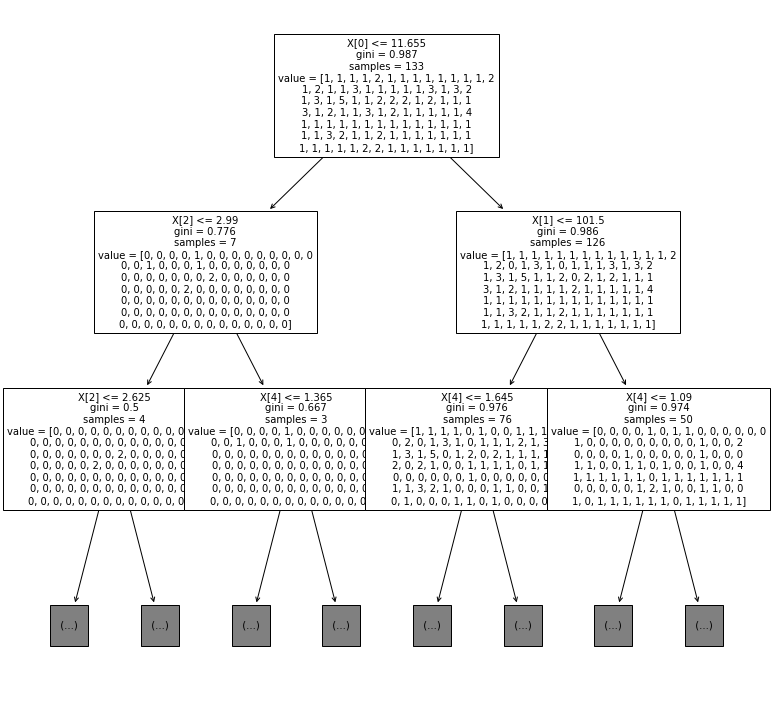

In [85]:
plt.figure(figsize=(13,13))
plot_tree(DT,fontsize=10,max_depth=2)

In [86]:
DT.feature_importances_

array([0.1834373 , 0.1420923 , 0.27147142, 0.18802542, 0.21497355])